In [2]:
import pandas as pd

# Load datasets
median_home_prices = pd.read_csv('C:\\Users\\vaibh\\HomeLLC 1st stage\\median_prices.csv')
mortgage_rates = pd.read_csv('C:\\Users\\vaibh\\HomeLLC 1st stage\\mortgage_30yrs_us.csv')
housing_inventory = pd.read_csv('C:\\Users\\vaibh\\HomeLLC 1st stage\\housing_inventory.csv')
gdp = pd.read_csv('C:\\Users\\vaibh\\HomeLLC 1st stage\\GDP.csv')
unemployment_rate = pd.read_csv('C:\\Users\\vaibh\\HomeLLC 1st stage\\unemp_rate.csv')
population_growth = pd.read_csv('C:\\Users\\vaibh\\HomeLLC 1st stage\\population_growth.csv')
building_permits = pd.read_csv('C:\\Users\\vaibh\HomeLLC 1st stage\\PERMIT.csv')
real_median_income = pd.read_csv('C:\\Users\\vaibh\\HomeLLC 1st stage\\median_hh_income.csv')

# Ensure all datasets are in a list for processing
datasets = [median_home_prices, mortgage_rates, housing_inventory, gdp, unemployment_rate, population_growth, building_permits, real_median_income]

# Print the first few rows of each dataset to verify
for dataset in datasets:
    print(dataset.head())


        DATE  MEDIAN PRICES
0   1/1/2004         212700
1   4/1/2004         217600
2   7/1/2004         213500
3  10/1/2004         228800
4   1/1/2005         232500
        DATE  MORTGAGE RATES
0   1/8/2004            5.87
1  1/15/2004            5.66
2  1/22/2004            5.64
3  1/29/2004            5.68
4   2/5/2004            5.72
        DATE  HOUSEHOLD INVENTORY
0   1/1/2004               122632
1   4/1/2004               123099
2   7/1/2004               123587
3  10/1/2004               124096
4   1/1/2005               124611
         DATE        GDP
0  2004-01-01  11923.447
1  2004-04-01  12112.815
2  2004-07-01  12305.307
3  2004-10-01  12527.214
4  2005-01-01  12767.286
       DATE  UN EMP RATE
0  1/1/2004          5.7
1  2/1/2004          5.6
2  3/1/2004          5.8
3  4/1/2004          5.6
4  5/1/2004          5.6
       DATE  POPULATION GROWTH
0  1/1/2004           0.925484
1  1/1/2005           0.921713
2  1/1/2006           0.964254
3  1/1/2007           0.951055

In [3]:
# Convert date columns to datetime format
for dataset in datasets:
    dataset['DATE'] = pd.to_datetime(dataset['DATE'])

In [4]:
# Resample data to quarterly frequency (if not already quarterly)
median_home_prices_quarterly = median_home_prices.resample('Q', on='DATE').mean()
mortgage_rates_quarterly = mortgage_rates.resample('Q', on='DATE').mean()
housing_inventory_quarterly = housing_inventory.resample('Q', on='DATE').mean()
gdp_quarterly = gdp.resample('Q', on='DATE').mean()
unemployment_rate_quarterly = unemployment_rate.resample('Q', on='DATE').mean()
population_growth_quarterly = population_growth.resample('Q', on='DATE').mean()
building_permits_quarterly = building_permits.resample('Q', on='DATE').mean()
real_median_income_quarterly = real_median_income.resample('Q', on='DATE').mean()


In [5]:
# Merge datasets on the date column
df = median_home_prices_quarterly\
    .merge(mortgage_rates_quarterly, on='DATE')\
    .merge(housing_inventory_quarterly, on='DATE')\
    .merge(gdp_quarterly, on='DATE')\
    .merge(unemployment_rate_quarterly, on='DATE')\
    .merge(population_growth_quarterly, on='DATE')\
    .merge(building_permits_quarterly, on='DATE')\
    .merge(real_median_income_quarterly, on='DATE')


In [6]:
# Handle missing values by forward filling and then backward filling
df.ffill(inplace=True)
df.bfill(inplace=True)


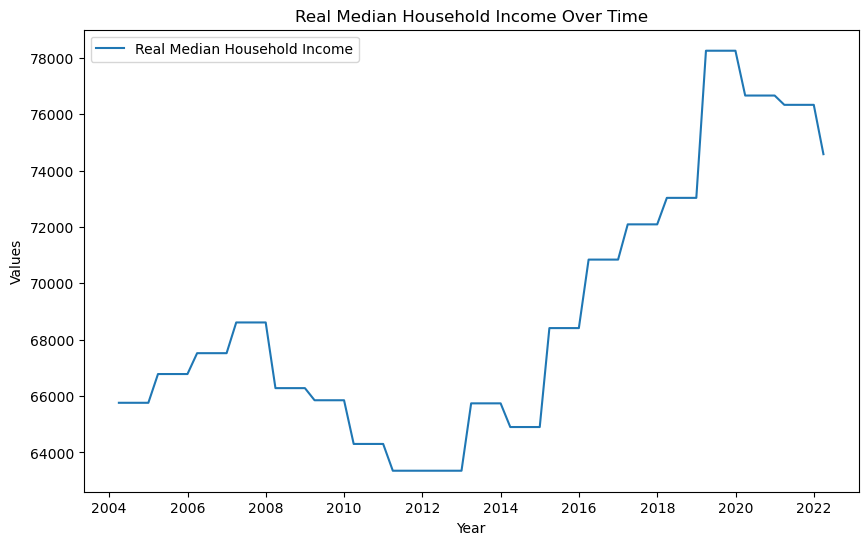

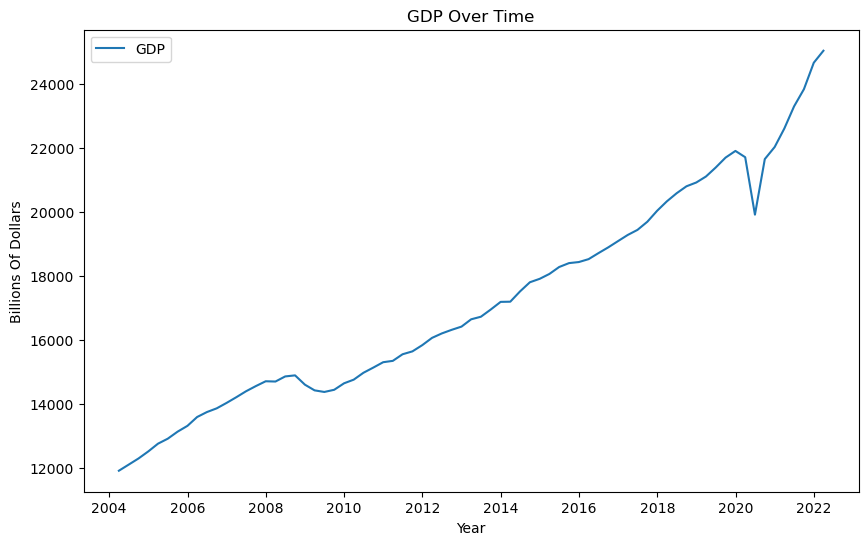

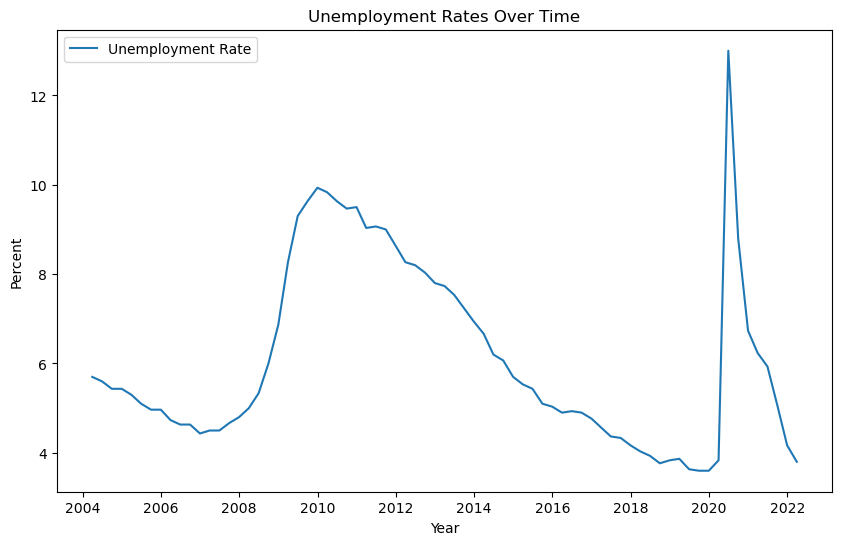

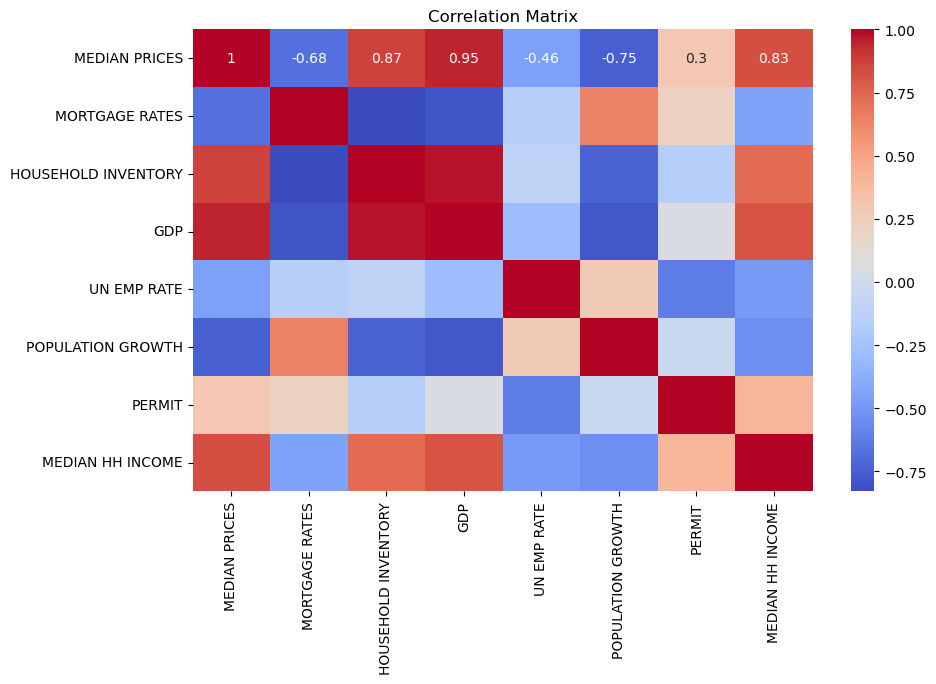

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a few key indicators over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MEDIAN HH INCOME'], label='Real Median Household Income')
#plt.plot(df.index, df['GDP'], label='GDP')
#plt.plot(df.index, df['UN EMP RATE'], label='Unemployment Rate')
plt.title('Real Median Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

# Plotting a few key indicators over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GDP'], label='GDP')
#plt.plot(df.index, df['UN EMP RATE'], label='Unemployment Rate')
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Billions Of Dollars')
plt.legend()
plt.show()

# Plotting a few key indicators over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['UN EMP RATE'], label='Unemployment Rate')
plt.title('Unemployment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
print(df.columns)


Index(['MEDIAN PRICES', 'MORTGAGE RATES', 'HOUSEHOLD INVENTORY', 'GDP',
       'UN EMP RATE', 'POPULATION GROWTH', 'PERMIT', 'MEDIAN HH INCOME'],
      dtype='object')


In [9]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define features and target
X = df.drop(columns=['MEDIAN PRICES'])
y = df['MEDIAN PRICES']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          MEDIAN PRICES   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     328.9
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           3.49e-48
Time:                        17:33:49   Log-Likelihood:                -763.35
No. Observations:                  73   AIC:                             1543.
Df Residuals:                      65   BIC:                             1561.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.709e+05   3

KeyError: 'MEDIAN PRICE'

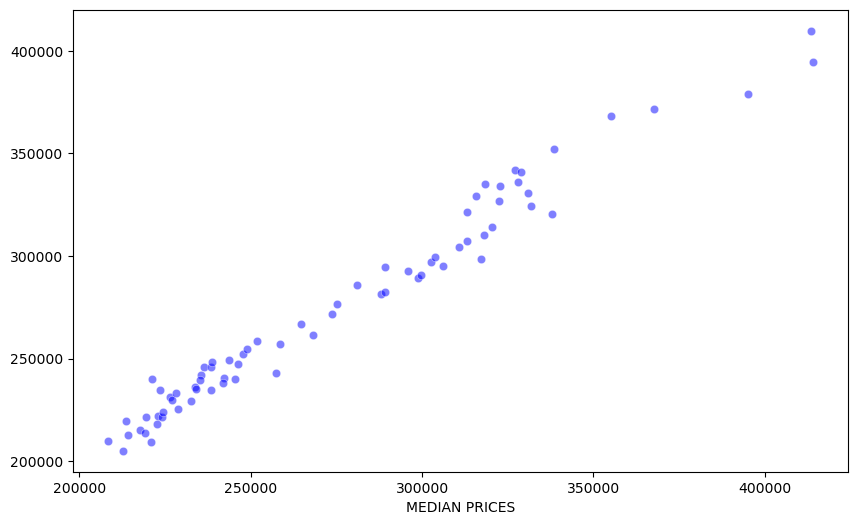

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6   ))
sns.scatterplot(x=df['MEDIAN PRICES'], y=model.predict(), color='blue', alpha=0.5)
plt.plot(df['MEDIAN PRICE'], df['MEDIAN PRICES'], color='red', linestyle='--')
plt.title('Actual vs. Predicted Median Home Prices')
plt.xlabel('Actual Median Home Prices')
plt.ylabel('Predicted Median Home Prices')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(), y=model.resid, lowess=True, color='green', scatter_kws={'alpha': 0.5})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
